<a href="https://colab.research.google.com/github/rackarmattan/DAT405/blob/master/Assignment4_group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAT405 Introduction to Data Science and AI 
##2020-2021, Reading Period 2
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 7zip (https://www.7-zip.org/download.html) to decompress the data.



In [ ]:
#Download and extract data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

--2020-12-01 12:33:04--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 95.216.24.32, 40.79.78.1, 95.216.26.30, ...
Connecting to spamassassin.apache.org (spamassassin.apache.org)|95.216.24.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1.6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2.3’

20021010_easy_ham.t 100%[===================>]   1.60M  1.84MB/s    in 0.9s    

2020-12-01 12:33:06 (1.84 MB/s) - ‘20021010_easy_ham.tar.bz2.3’ saved [1677144/1677144]

--2020-12-01 12:33:06--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 95.216.24.32, 40.79.78.1, 95.216.26.30, ...
Connecting to spamassassin.apache.org (spamassassin.apache.org)|95.216.24.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [ ]:
!ls -lah  
#!cat easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e
#!ls -lah easy_ham/
#!cat sample_data/mnist_train_small.csv

total 16M
drwxr-xr-x 1 root root 4.0K Dec  1 12:33 .
drwxr-xr-x 1 root root 4.0K Dec  1 08:20 ..
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.1
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.2
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.3
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.1
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.2
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.3
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2.1
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2.2
-rw-r--r-- 1 root root 1.2M Jun 29  2004 20021010_spam.tar.bz2.3
drwxr-xr-x 1 root root 4.0K Nov 20 17:15 .config
drwx--x--x 2  500  500 168K Oct 10  2002 easy_ha

###1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)


In [ ]:
#pre-processing code here
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 
import glob
from sklearn.model_selection import train_test_split

# Set the paths for the files that we are going to extract
path_spam = r'spam' # use your path
path_ham = r'easy_ham'
path_hard_ham = r'hard_ham'
all_files_spam = glob.glob(path_spam + "/*")
all_files_ham = glob.glob(path_ham +"/*")
all_files_hard_ham = glob.glob(path_hard_ham +"/*")

# Returns a list of tuples with emails along with their label 
def get_data_list(end, path_list, label, start=0):
  mail = ""
  data_set = []
  errors = 0
  error = False
  for i in range(start, end):
    error = False
    # Try to open the file as UTF-8, if it doesn't work, ignore that file
    try:
      with open(path_list[i], 'r') as infile:
        # Append all lines in the email to one email
        for line in infile:
          mail += line
    except UnicodeDecodeError:
      errors += 1
      error = True
    if not error:
      # If there wasn't an error, add the email together with its label in a list
      data_set.append((mail, label))
      mail = ""
  return data_set

# Create lists with tuples of the mails
all_ham = get_data_list(len(all_files_ham), all_files_ham, 'ham')
all_spam = get_data_list(len(all_files_spam), all_files_spam, 'spam')
all_hard_ham = get_data_list(len(all_files_hard_ham), all_files_hard_ham, 'ham')

# Create DataFrames from the lists
df_ham = pd.DataFrame(all_ham, columns=['message', 'label'])
df_hard_ham = pd.DataFrame(all_hard_ham, columns=['message', 'label'])
df_spam = pd.DataFrame(all_spam, columns=['message', 'label'])

# Concatenate the DataFrames
df_ham_spam = pd.concat([df_ham, df_spam], axis=0)
df_hard_ham_spam = pd.concat([df_hard_ham, df_spam], axis=0)


###2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





In [ ]:
#Code here
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Labels for confusion matrix
group_names = ['True ham','False spam','False ham','True spam']
categories= ["Ham", "Spam"]

# Function for printing confusion matrix based on multinomial or bernoulli native bayes
def print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, groupnames, title, multi=False):
  vectorizer = CountVectorizer()
  
  # Count how often the words in the train dataset occur and transform the train dataset to a matrix
  # that shows how many times each word in each message occurs
  hamtrain = vectorizer.fit_transform(hamtrain)
  # Transform the test dataset to a matrix like the above one
  hamtest = vectorizer.transform(hamtest)

  if multi:
    model = MultinomialNB()
  else:
    model = BernoulliNB()
  
  # Fit the train sets to the naive bayes model
  model.fit(hamtrain, spamtrain)

  print(model.score(hamtest, spamtest))

  spam_test_pred = model.predict(hamtest)
  cm = confusion_matrix(spamtest, spam_test_pred)

  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  df_cm = pd.DataFrame(cm, range(2), range(2))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=labels, fmt='', cmap="YlGnBu", xticklabels=categories, yticklabels=categories) 

  pyplot.title(title)
  pyplot.ylabel("True label")
  pyplot.xlabel("Predicted label")
  # Draw and show the plot
  pyplot.draw()
  pyplot.show()

In [ ]:
# Function for printing confusion matrix based on bernoulli or multinomial native bayes, 
# with the option to use CountVectorizers built in filtering 
def print_cm_filtered(hamtrain, hamtest, spamtrain, spamtest, categories, groupnames, title, mindf, maxfeature, multi=False):
  vectorizer = CountVectorizer(min_df=mindf, max_features=maxfeature, stop_words='english')
  
  # Count how often the words in the train dataset occur and transform the train dataset to a matrix
  # that shows how many times each word in each message occurs
  hamtrain = vectorizer.fit_transform(hamtrain)
  # Transform the test dataset to a matrix like the above one
  hamtest = vectorizer.transform(hamtest)

  if multi:
    model = MultinomialNB()
  else:
    model = BernoulliNB()
  
  # Fit the train sets to the naive bayes model
  model.fit(hamtrain, spamtrain)

  # Print how accurate the model was
  print(model.score(hamtest, spamtest))

  # Test the model on the ham part of the data
  spam_test_pred = model.predict(hamtest)

  # Create a confusion matrix with the prediction and the actual classifications
  cm = confusion_matrix(spamtest, spam_test_pred)

  # Print the confusion matrix with labels and perfentages
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  df_cm = pd.DataFrame(cm, range(2), range(2))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=labels, fmt='', cmap="YlGnBu", xticklabels=categories, yticklabels=categories) 

  pyplot.title(title)
  pyplot.ylabel("True label")
  pyplot.xlabel("Predicted label")

  # Draw and show the plot
  pyplot.draw()
  pyplot.show()

The Bernoulli model classifies document by vectorizing it into a two-dimensional vector with the words as one dimension and a binary number,1 or 0 as the other indicating if the word occurs more than once or not in the document. Since it on only handles a binary parameter for each word it can only classify a document into one class or another, as for our data spam or not spam. 
The multinomial model, on the other hand, captures the frequency of the words in a document and not only if the word occurs more than once or not. 

Our results show that the Multinomial classification method shows better results overall for our data comparing to the Bernoulli model, except after filtering the data with the built-in methods in the CountVecotorizer class, then the Bernoulli classification has higher accuracy than the Multinomial. As can be read in the article, A. McCallum and K. Nigam (1998), Bernoulli has shown to be less accurate with big data sets compared to the multinomial classification. This reflects on our results as well since the hard ham, which had more than the double amount of words in its messages, had a higher impact on the Bernoulli accurate score than the Multinomial. 



A. McCallum and K. Nigam (1998). A comparison of event models for Naive Bayes text classification. Proc. AAAI/ICML-98 Workshop on Learning for Text Categorization, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.46.1529&rep=rep1&type=pdf
Your discussion here

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

0.9702970297029703


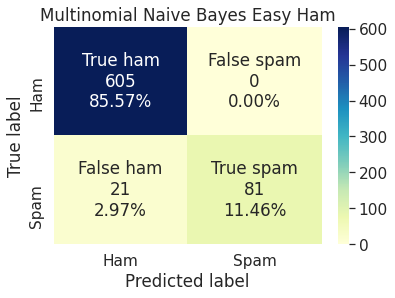

In [ ]:

# Multinomial
# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_ham_spam['message'], df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes Easy Ham", multi=True)



0.95


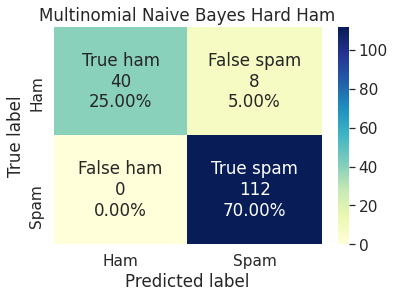

In [ ]:

# Multinomial
# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_hard_ham_spam['message'], df_hard_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes Hard Ham", multi=True)



0.9264497878359265


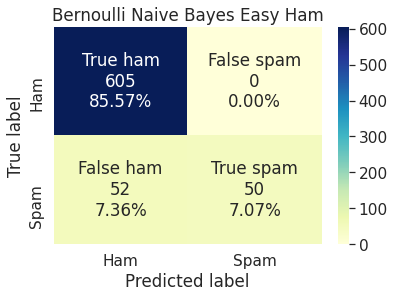

In [ ]:
# Spam = 1, Ham = 0
df_ham_spam.loc[df_ham_spam['label'] == 'spam', 'label'] = 1
df_ham_spam.loc[df_ham_spam['label'] == 'ham', 'label'] = 0

# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_ham_spam['message'], df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes Easy Ham", multi=False)


0.88125


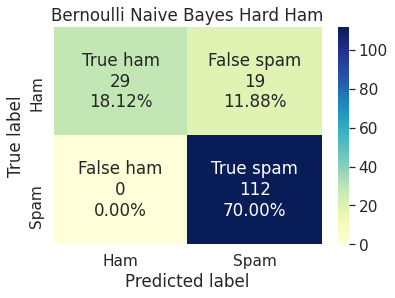

In [ ]:
# Spam = 1, Ham = 0
df_hard_ham_spam.loc[df_hard_ham_spam['label'] == 'spam', 'label'] = 1
df_hard_ham_spam.loc[df_hard_ham_spam['label'] == 'ham', 'label'] = 0

# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_hard_ham_spam['message'], df_hard_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes Hard Ham", multi=False)


###4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.

**Our answers:**

**a.** If some words are appearing very frequently in both spam and ham, they may not be a typical "spam" nor "ham" word, just a common word. This could eventually lead to confusion in the decision making, as they are neither one class nore the other. These types of words could be beneficial to ignore, as they do not contribute that much. When we ran the CountVectorizer, we could see that number or sign sequencies like "00" or "--" appeared, which does not say that much about whether an email is spam or ham. To apply `stopwords='english'` in the CountVectorizer, we get rid of those. 


In [ ]:
import statistics

vc_ham = CountVectorizer()
vc_spam = CountVectorizer()

voc_ham = vc_ham.fit(df_ham["message"]).vocabulary_
voc_ham_sort = dict(sorted(voc_ham.items(), key=lambda item: item[1]))

voc_spam = vc_spam.fit(df_spam["message"]).vocabulary_
voc_spam_sort = dict(sorted(voc_spam.items(), key=lambda item: item[1]))

def get_mean(meandict):
  sum = 0
  for key, value in meandict.items():
    sum += value
  return sum/len(meandict)

def get_median(sortedlist):
  l = len(sortedlist)
  if l%2 == 0:
    return (sortedlist[l//2] + sortedlist[l//2 - 1]) / 2
  else:
    return sortedlist[l//2]

mean_ham = get_mean(voc_ham_sort)
mean_spam = get_mean(voc_spam_sort)
stdev_ham = statistics.stdev(list(voc_ham_sort.values()))
stdev_spam = statistics.stdev(list(voc_spam_sort.values()))

print("Mean ham ", get_mean(voc_ham_sort), "Median ham ", get_median(list(voc_ham_sort.values())), "Stdev ham ", statistics.stdev(list(voc_ham_sort.values())))
print("Mean spam ", get_mean(voc_spam_sort), "Median spam ", get_median(list(voc_spam_sort.values())), "Stdev spam ", statistics.stdev(list(voc_spam_sort.values())))


def get_freq_words(worddict, mean, stdev, large=True):
  rlist = []
  for key, value in worddict.items():
    if large and value > mean + stdev:
      rlist.append(key)
    elif not large and value < mean - stdev:
      rlist.append(key)
  return rlist

freq_words_spam = get_freq_words(voc_spam_sort, mean_spam, stdev_spam)
freq_words_ham = get_freq_words(voc_ham_sort, mean_ham, stdev_spam)

unfreq_words_spam = get_freq_words(voc_spam_sort, mean_spam, stdev_spam, large=False)
unfreq_words_ham = get_freq_words(voc_ham_sort, mean_ham, stdev_ham, large=False)

print(len(freq_words_ham))
print(len(freq_words_spam))

freq_both = set(freq_words_ham).intersection(freq_words_spam)
unfreq_both = set(unfreq_words_ham).intersection(unfreq_words_spam)

print(unfreq_both)


Mean ham  22761.5 Median ham  22761.5 Stdev ham  13141.791164068922
Mean spam  15939.0 Median spam  15939 Stdev spam  9202.818915962653
13559
6737
{'0700', '700', '386', '33', '267', '286', '2173', '171', '208', '12k', '505', '290', '00pm', '417', '548', '400', '2nd', '1008', '299', '3a', '167', '4u', '0600', '246', '3f', '20020912', '504', '532', '242', '310', '554', '184', '3c', '2600', '280', '07', '375', '5px', '287', '189', '1302', '251', '540', '1007', '344', '140', '2195', '3000', '4905', '10', '16th', '5th', '178', '448', '106', '295', '529', '346', '57', '439', '124', '6d', '291', '227', '366', '5329', '5f', '289', '394', '02', '0100', '67', '148', '426', '642', '11pt', '5s', '4ft', '536', '154', '2650', '226', '20020827', '08', '2215', '186', '1st', '144', '473', '34', '20', '21st', '327', '100000', '0px', '116', '1b', '364', '002', '445', '48', '190', '596', '131', '239', '0a', '00426', '605', '559', '0953', '1992', '2c', '318', '2800', '1w', '604', '6f', '129', '203', '508'

In [ ]:

filtered_df_ham_spam = pd.DataFrame(data= {'message': [], 'label': []})
words_to_filter = list(freq_both) + list(unfreq_both)
removed_words_counter = 0

for message, label in df_ham_spam.itertuples(index=False):
  words_in_message = message.split(" ")
  # Remove words in message
  for word in words_to_filter:
    if word in words_in_message:
      words_in_message.remove(word)
      removed_words_counter += 1

  new_message = " ".join(words_in_message)
  filtered_df_ham_spam = filtered_df_ham_spam.append({'message': new_message, 'label': label}, ignore_index=True)


print("The filter removed", removed_words_counter, "uncommon and common words")



The filter removed 59622 uncommon and common words


0.9278642149929278


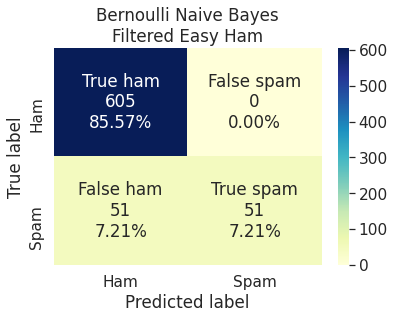

In [ ]:
# Spam = 1, Ham = 0
filtered_df_ham_spam.loc[filtered_df_ham_spam['label'] == 'spam', 'label'] = 1
filtered_df_ham_spam.loc[filtered_df_ham_spam['label'] == 'ham', 'label'] = 0

# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(filtered_df_ham_spam['message'], filtered_df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes\nFiltered Easy Ham", multi=False)

0.9731258840169731


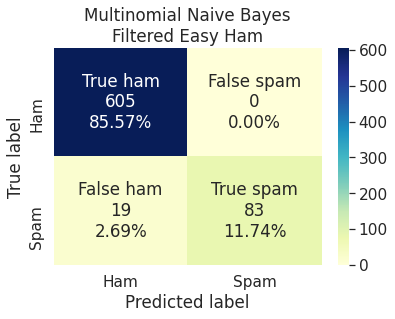

In [ ]:
print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes\nFiltered Easy Ham", multi=True)

0.9900990099009901


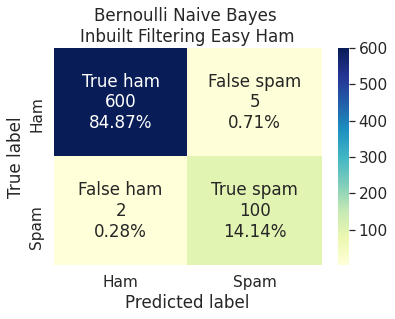

In [ ]:
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_ham_spam['message'], df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm_filtered(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes \nInbuilt Filtering Easy Ham", 0.01, 50000, multi=False)

0.9731258840169731


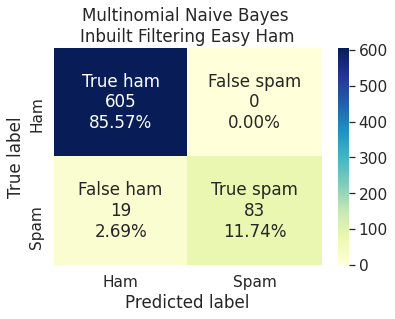

In [ ]:
print_cm_filtered(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes \nInbuilt Filtering Easy Ham", 0.01, 50000, multi=True)


###5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.

**Our answers:**

With inbuilt filtering, we are referring to the filtering in CountVectorizer.

- Does the result improve from 3 and 4? 
  - Yes and no. For multinomial, the result got better with inbuilt filtering and filtering of email, than with just inbuilt filtering (about 2%). With the filtered emails, but no inbuilt filtering, the result was not significantly better, just 0.5%. For Bernoulli, the results were actually a bit worse than with no filtering of the emails.
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
  - If you have a very small test set, the test set may only contain emails that are easy-detectable as ham/spam, and therefore the model will be considered as very accurate. Likewise, the test set could only contain very hard emails and predict wrong on all of them. If the train set, on the other hand, is very small and the test set big, the model would not have the possibility to train on a big variety of emails, and therefore just guess on the test emails that it gets. If the model still performs good, it would probably be out of pure luck, as it may be so that it has not seen a lot of the emails. As we searched for ideal proportions, many articles suggested to divide the sets into around 70% for training, and the 30 remaining percents for testing, and to get all the possible patterns that appears in the data into the training set. This makes the model prepared for everything that is currently known to happen. By using the `train_test_split` function, we are dividing the dataset with random emails in each set.
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 
  - If the training messages would mostly consist of either ham or spam, the model would only be prepared for such mesasges. That is, the model would be more likely to predict test mails as ham if it only trained on ham, and vice versa. In a confusion matrix, the model would predict a lot of True Ham, but also a lot of False Spam. 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
  - This parameter tells the model whether it should learn the prior probabilities for the classes or not. If `fit_prior` is set to `False`, the prior probabilities for the classes will be uniform. In our case, this means that the porbability of spam will be 0.5 and the probability for ham will be 0.5, as we have two classes.
- How does this alter the predictions? Discuss why or why not.
  - This makes our predictions slightly worse. As the model is not learning the prior probabilities for each class, just sets it to 0.5, this should mean that the prior probabilities that the models learned earlier is not equal to 0.5. If they indeed were 0.5, the result sohuld have been the same.

In [ ]:
# Ignore everything before the message-id in each mail (an attempt of removing a lot of the header)
# also, ignore every line containing <>, as they usually appear in the footer and header together with
# "From" "To" and so on. 
def filter_mails(maillist):
  return_list = []
  for m in maillist:
    final_mail = ""
    current_mail = m[0].split("\n")
    i = 0
    while "message-id" not in current_mail[i].lower() and i < len(current_mail) -1:
      i += 1
    while i < len(current_mail):
      if "<" in current_mail[i] and ">" in current_mail[i]:
        i += 1
        continue
      final_mail += current_mail[i]
      i += 1
    return_list.append((final_mail, m[1]))
  return return_list

# Create lists with tuples of the mails
all_ham = get_data_list(len(all_files_ham), all_files_ham, 'ham')
all_spam = get_data_list(len(all_files_spam), all_files_spam, 'spam')

# Filter the lists
all_ham = filter_mails(all_ham)
all_spam = filter_mails(all_spam)

# Create DataFrames from the lists
df_ham = pd.DataFrame(all_ham, columns=['message', 'label'])
df_spam = pd.DataFrame(all_spam, columns=['message', 'label'])

# Concatenate the DataFrames
df_ham_spam = pd.concat([df_ham, df_spam], axis=0)  


0.9745403111739745


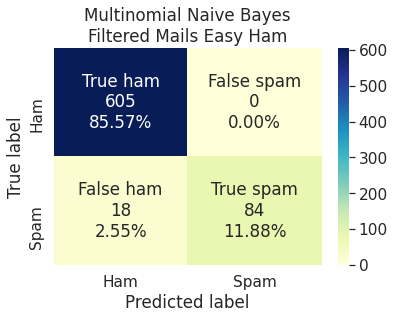

In [ ]:
# Create datasets with 25% in test and 75% in train
hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_ham_spam['message'], df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes\nFiltered Mails Easy Ham", multi=True)

0.9900990099009901


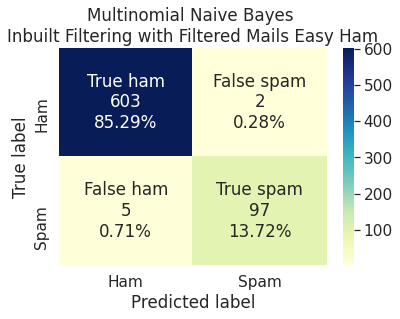

In [ ]:
print_cm_filtered(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes \nInbuilt Filtering with Filtered Mails Easy Ham", 0.01, 50000, multi=True)

0.9165487977369166


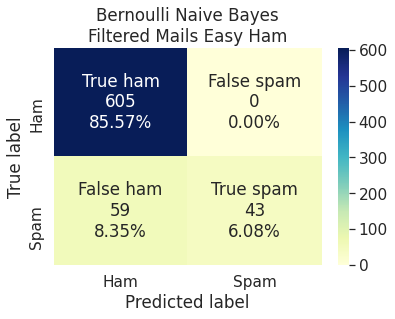

In [ ]:
# Spam = 1, Ham = 0
df_ham_spam.loc[df_ham_spam['label'] == 'spam', 'label'] = 1
df_ham_spam.loc[df_ham_spam['label'] == 'ham', 'label'] = 0

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes\nFiltered Mails Easy Ham", multi=False)

0.9844413012729845


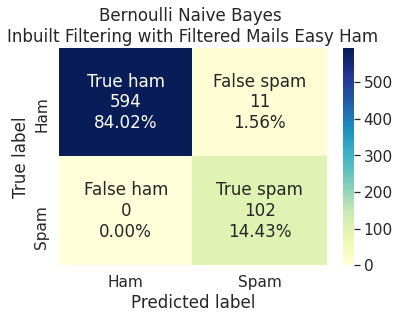

In [ ]:
print_cm_filtered(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes \nInbuilt Filtering with Filtered Mails Easy Ham", 0.01, 50000, multi=False)

In [ ]:
# Function for printing confusion matrix based on multinomial or bernoulli native bayes
def print_cm_no_fit_prior(hamtrain, hamtest, spamtrain, spamtest, categories, groupnames, title, multi=False):
  vectorizer = CountVectorizer()
  
  # Count how often the words in the train dataset occur and transform the train dataset to a matrix
  # that shows how many times each word in each message occurs
  hamtrain = vectorizer.fit_transform(hamtrain)
  # Transform the test dataset to a matrix like the above one
  hamtest = vectorizer.transform(hamtest)

  if multi:
    model = MultinomialNB(fit_prior=False)
  else:
    model = BernoulliNB(fit_prior=False)
  
  # Fit the train sets to the naive bayes model
  model.fit(hamtrain, spamtrain)

  print(model.score(hamtest, spamtest))

  spam_test_pred = model.predict(hamtest)
  cm = confusion_matrix(spamtest, spam_test_pred)

  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  df_cm = pd.DataFrame(cm, range(2), range(2))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=labels, fmt='', cmap="YlGnBu", xticklabels=categories, yticklabels=categories) 

  pyplot.title(title)
  pyplot.ylabel("True label")
  pyplot.xlabel("Predicted label")
  # Draw and show the plot
  pyplot.draw()
  pyplot.show()

0.9759547383309759


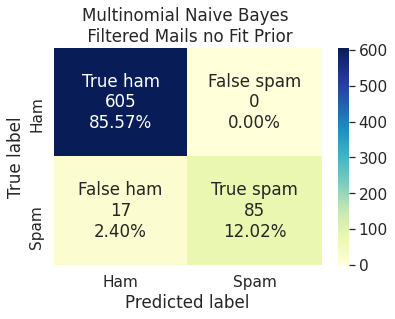

In [ ]:
# Create DataFrames from the lists
df_ham = pd.DataFrame(all_ham, columns=['message', 'label'])
df_spam = pd.DataFrame(all_spam, columns=['message', 'label'])

hamtrain, hamtest, spamtrain, spamtest = train_test_split(df_ham_spam['message'], df_ham_spam['label'].values.tolist(), test_size=0.25, random_state=5)

print_cm_no_fit_prior(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Multinomial Naive Bayes \n Filtered Mails no Fit Prior", multi=True)


0.9165487977369166


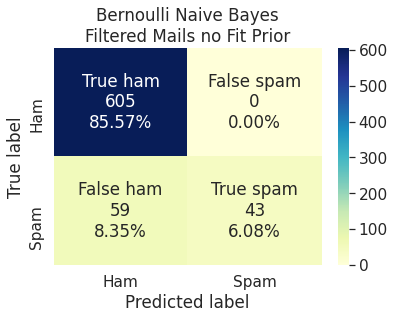

In [ ]:
# Spam = 1, Ham = 0
df_ham_spam.loc[df_ham_spam['label'] == 'spam', 'label'] = 1
df_ham_spam.loc[df_ham_spam['label'] == 'ham', 'label'] = 0

print_cm(hamtrain, hamtest, spamtrain, spamtest, categories, group_names, "Bernoulli Naive Bayes\nFiltered Mails no Fit Prior", multi=False)

### What to report and how to hand in.

- You will need to clearly report all results in the notebook in a clear and appropriate way, either using plots or code output (f.x. "print statements"). 
- The notebook must be reproducible, that means, we must be able to use the `Run all` function from the `Runtime` menu and reproduce all your results. **Please check this before handing in.** 
- Save the notebook and share a link to the notebook (Press share in upper left corner, and use `Get link` option. **Please make sure to allow all with the link to open and edit.**
- Edits made after submission deadline will be ignored, graders will recover the last saved version before deadline from the revisions history.
- **Please make sure all cells are executed and all the output is clearly readable/visible to anybody opening the notebook.**